## VGG16

Problem: VGG-16 is trained for 3-channel RGB images, which may not perform well with grayscale preprocessing of data. [source](https://towardsdatascience.com/a-demonstration-of-transfer-learning-of-vgg-convolutional-neural-network-pre-trained-model-with-c9f5b8b1ab0a)

In [11]:
# !pip install keras
# !pip install tensorflow #keras requires tensorflow

In [47]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.applications.vgg16 import VGG16

from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

In [48]:
# load model
base_model = VGG16(weights='imagenet')

# summarize the model
# base_model.summary()

---

### Code below is from [here](https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/)

In [49]:
VGG16().summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

---

### CIFAR-10

https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


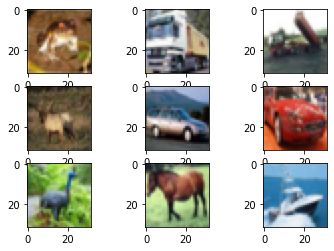

In [60]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(trainX[i])
    
# show the figure
plt.show()

In [56]:
np.unique(trainy)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [83]:
import sys
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# load train and test dataset
def load_cifar_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

def prep_pixels(train, test):
    train_norm = train.astype('float32') / 255.0
    test_norm = test.astype('float32') / 255.0
    return train_norm, test_norm
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    plt.savefig('../images/vgg16_diagnostic_plot.png')
    plt.close()
    
# run the test harness for evaluating a model
def run_test_harness(load_dataset, epochs=100, batch_size=64, verbose=0):
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    print('Dataset Loaded!')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    print('Dataset Preprocessed!')
    # define model
    model = define_model()
    # fit model
    print('Fitting model...')
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(testX, testY), verbose=verbose)
    print('Model fitted! Epochs=%d, Batch Size=%d' % (epochs, batch_size))
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('Model Evalution:')
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    
    return model

In [87]:
# define cnn model
def define_model():
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
#     model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#     model.add(Dense(10, activation='softmax'))
    
#     # compile model
#     opt = SGD(lr=0.001, momentum=0.9)
#     model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # grab the pre-trained VGG16 model, removing the top layers and changing the input shape
    model = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
#     model.summary()
        
    # freeze pre-trained layers
    for layer in model.layers:
        layer.trainable = False

    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(1024, activation='relu')(flat1)
    output = Dense(10, activation='softmax')(class1)

    # define new model with top layers
    model = Model(inputs=model.inputs, outputs=output)
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [3]:
def load_server_dataset(folder_name):
    '''
    Given a folder name on Materiall's shared server, read in all the files, convert them to pixels, and separate them into train and testing data.
    '''
    

Model fitted! Epochs=100, Batch Size=64


In [ ]:
# entry point, run the test harness
# trained_model = run_test_harness(load_cifar_dataset)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     